<a href="https://colab.research.google.com/github/Manav-Gupta/spectral_class/blob/main/spectral_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Mounting the drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import keras
from pandas import DataFrame
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score

In [9]:
#Reading the dataset
dataset=pd.read_csv('drive/My Drive/spectral_class.csv')
dataset.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [10]:
dataset.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [11]:
dataset['Star type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [12]:
#Checking for the NaN values
dataset.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [13]:
#Displaying the spectral classes for the stars present in the dataset
set(dataset['Spectral Class']) 

{'A', 'B', 'F', 'G', 'K', 'M', 'O'}

In [14]:
#Displaying the star color which is a combination of 5 colors
set(dataset['Star color']) 

{'Blue',
 'Blue ',
 'Blue White',
 'Blue white',
 'Blue white ',
 'Blue-White',
 'Blue-white',
 'Orange',
 'Orange-Red',
 'Pale yellow orange',
 'Red',
 'White',
 'White-Yellow',
 'Whitish',
 'Yellowish',
 'Yellowish White',
 'white',
 'yellow-white',
 'yellowish'}

In [15]:
#Assigning a numerical value to the spectral class
df=dataset
df['Spectral Class'] = df['Spectral Class'].map({'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6})
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,6
1,3042,0.000500,0.1542,16.60,0,Red,6
2,2600,0.000300,0.1020,18.70,0,Red,6
3,2800,0.000200,0.1600,16.65,0,Red,6
4,1939,0.000138,0.1030,20.06,0,Red,6


In [16]:
#Creating attributes for individual colors to separate the contributions of different colors in combinations
df[['Blue','White','Orange','Red','Yellow']] = 0
df.loc[df['Star color'].str.contains("Blue",case=False),'Blue']=1
df.loc[df['Star color'].str.contains("Whit",case=False),'White']=1
df.loc[df['Star color'].str.contains("Red",case=False),'Red']=1
df.loc[df['Star color'].str.contains("Yellow",case=False),'Yellow']=1
df.loc[df['Star color'].str.contains("Orange",case=False),'Orange']=1

In [17]:
#Dropping the original star color column
df.drop(labels=['Star color'],axis=1, inplace=True)
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Spectral Class,Blue,White,Orange,Red,Yellow
0,3068,0.002400,0.1700,16.12,0,6,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,6,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,6,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,6,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,6,0,0,0,1,0


In [21]:
#Establishing the test dataset of features
df1=df.drop(['Spectral Class'],axis=1)

In [22]:
#Establishing the test dataset for output
df2=df['Star type'].values

In [23]:
#Scaling data
scale_x = MinMaxScaler(feature_range=(0,1))
scaled_x=scale_x.fit_transform(df1)
print(scaled_x.shape)
df2=df2.reshape(-1, 1)
scale_y = MinMaxScaler(feature_range=(0,1))
scaled_y=scale_y.fit_transform(df2)
print(scaled_y.shape)
print(scaled_x)

(240, 10)
(240, 1)
[[2.96629095e-02 2.73127546e-09 8.29359490e-05 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.89797956e-02 4.94455040e-10 7.48271124e-05 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.73668585e-02 2.59000259e-10 4.80371586e-05 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [1.81025196e-01 6.32776483e-01 7.30304200e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.91692283e-01 4.76725295e-01 5.70693556e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.44352487e-01 3.47181606e-01 9.15062503e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [24]:
#Converting data into readable format of LSTM for previous 5 timesteps
x=list()
y=list()
ws=5
for i in range(len(df)-ws):
  xx=list()
  for j in range(0,ws-1,1):
    value=scaled_x[i+j]
    xx.append(value)
  x.append(xx)
  yy=scaled_y[i+ws-1]
  y.append(yy)
#Input of  LSTM 
x=np.array(x)
#Output of LSTM
y=np.array(y)
print(x.shape)

(235, 4, 10)


In [25]:
#Splitting data into training 70% , testing 15% and validation 15%
n_train_hours = 168
n_valid_hours = 204

train_x = x[:n_train_hours]
test_x = x[n_valid_hours:]
valid_x= x[n_train_hours:n_valid_hours]

train_y = y[:n_train_hours]
test_y = y[n_valid_hours:]
valid_y= y[n_train_hours:n_valid_hours]

Epoch 1/150
17/17 [==============================] - 2s 35ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 2/150
17/17 [==============================] - 0s 5ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 4/150
17/17 [==============================] - 0s 5ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 5/150
17/17 [==============================] - 0s 6ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 6/150
17/17 [==============================] - 0s 6ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 7/150
17/17 [==============================] - 0s 6ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 8/150
17/17 [==============================] - 0s 6ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 9/150
17/17 [==============================] - 0s 6ms/step - loss: 4.9364e-08 - val_loss: 4.3710e-08
Epoch 10/150
17/17 [================

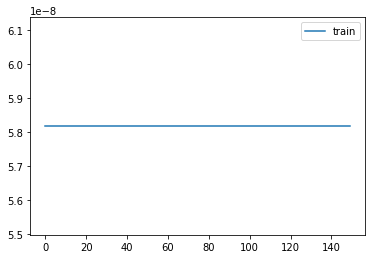

In [26]:
#Declaration of model
model = Sequential()
#adding LSTM layer
model.add(LSTM(64, input_shape=(9,10),kernel_initializer='truncated_normal'))
model.add(Dense(1,activation='linear'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001))
#Training the model
history = model.fit(train_x, train_y, epochs=150, batch_size=10, validation_data=(valid_x, valid_y), verbose=1, shuffle=False)
#Plotting the loss graphs
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [29]:
#Rescaling the data 
import sklearn.metrics as metrics
yhat = model.predict(test_x)

inv_yhat = scale_y.inverse_transform(yhat)

inv_y = scale_y.inverse_transform(test_y)

#Finding the accuracy with RMSE function
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.721


In [28]:
#Finding the accuracy with nRMSE function
nrmse=rmse/np.mean(inv_y)
nrmse

0.9693976114739693